# PHYS 223 Assignment 6
## Aaron Cohen - V01018161

In [33]:
# all imports and setup that we might need

import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

import dwave_networkx as dnx

from dimod.reference.samplers import ExactSolver
sampler_CPU = ExactSolver()

from dwave.system import DWaveSampler, EmbeddingComposite
sampler_6 = EmbeddingComposite(DWaveSampler(id='Advantage_system6.4'))

from dimod.generators import combinations
from dimod import BinaryQuadraticModel

### Question 1

In class we described a minor-embedding procedure to implement 3-qubit 3-SAT (logical qubits *a*, *b*, *c*) with 3 physical quibits ($q_0, q_1, q_4, q_5$). The procedure assumed $b = q_0 = q_5$ so that it required $q_0$ and $q_5$ to be "chained" in the same state. We concluded that the required QUBO was:

$
\begin{align}
E(q) = \frac{1}{3}(q_0 + q_5) - \frac{1}{3}(q_1 + q_4) + \frac{2}{3}(q_0q_4 + q_1q_4 + q_1q_5) - (q_0q_5)
\end{align}
$

Using your "classical" CPU, write down a python code that generates the energy table for all values of **q** and explain that this QUBO does ineed implement 3-SAT as the lowest energy state of the quantumn system.
*Hint:* Use the sampler `ExactSolver` from `dimod` to generate a list of all possibilities.

In [8]:
linear = {('q0', 'q0'): 1/3, ('q5', 'q5'): 1/3, ('q1', 'q1'): -1/3, ('q4', 'q4'): -1/3}
quadratic = {('q0', 'q4'): 2/3, ('q1', 'q4'): 2/3, ('q1', 'q5'): 2/3, ('q0', 'q5'): -1}
Q1 = dict(linear)
Q1.update(quadratic)

responseQ1 = sampler_CPU.sample_qubo(Q1)
for (sample, energy, num) in responseQ1.data():
    # filter out invalid solutions where q0 != q5 (makes it easier to find what we're looking for)
    if sample['q0'] == sample['q5']:
        print(sample, "Energy: ", energy, "Occurrences: ", num)

{'q0': 1, 'q1': 0, 'q4': 0, 'q5': 1} Energy:  -0.33333333333333337 Occurrences:  1
{'q0': 0, 'q1': 1, 'q4': 0, 'q5': 0} Energy:  -0.3333333333333333 Occurrences:  1
{'q0': 0, 'q1': 0, 'q4': 1, 'q5': 0} Energy:  -0.3333333333333333 Occurrences:  1
{'q0': 1, 'q1': 1, 'q4': 0, 'q5': 1} Energy:  -1.1102230246251565e-16 Occurrences:  1
{'q0': 1, 'q1': 0, 'q4': 1, 'q5': 1} Energy:  -1.1102230246251565e-16 Occurrences:  1
{'q0': 0, 'q1': 0, 'q4': 0, 'q5': 0} Energy:  0.0 Occurrences:  1
{'q0': 0, 'q1': 1, 'q4': 1, 'q5': 0} Energy:  0.0 Occurrences:  1
{'q0': 1, 'q1': 1, 'q4': 1, 'q5': 1} Energy:  0.9999999999999998 Occurrences:  1


The above output shows all possible combinations of the qubits where $q_0 = q_5$. We can see that three solutions have the lowest energy level of $-0.33\ldots$: $q_0q_1q_4q_5 = 1001$, $q_0q_1q_4q_5 = 0100$, and $q_0q_1q_4q_5 = 0010$.

Now, since $q_0 = q_5$, we rewrite this data so that it is easier to understand the solutions that this QUBO has given us for the 3-SAT problem:
- 100
- 010
- 001

These solutions indeed are correct as all solutions of 3-SAT with three qubits by definition must satisfy that the summation of all bits minus 1 is equal to 0 which is indeed the case for all 3 of these.

### Question 2

Implement a 10-qubit 3-SAT subject to the following eight clauses: $C_1(0,1,2), C_2(1,2,3), C_3(2,3,4), C_4(3,4,5), C_5(4,5,6), C_6(5,6,7), C_7(6,7,8), C_8(7,8,9).$ Note that $'0', '1', '2', \ldots$ represents binary variables, and each clause is satisfied (`True`) if only one of the three variables is $1$ and the other two are $0$.

*Hint:* The function `combinations(['0', '1', '2'], 1)` creates the BQM for $C_1(0,1,2).$ Can you write a loop to implement all of the other clauses together?

(a) Run the brute force function `ExactSolver` to find all possible answers.

In [25]:
# build a list of all clauses
clauses = []
for i in range(8):
    clauses.append([str(i), str(i+1), str(i+2)])

# create the base bqm from clauses[0]
bqmQuestion2 = combinations(clauses[0], 1)

# merge in the rest of the clauses
for i in range(7):
    bqmQuestion2.update(combinations(clauses[i+1], 1))

# sample and find the solutions
minEnergyBF = None
solutionsBF = []
responseQ2BF = sampler_CPU.sample(bqmQuestion2)
for (sample, energy, num) in responseQ2BF.data():

    if minEnergyBF is None:
        minEnergyBF = energy
    elif energy < minEnergyBF:
        minEnergyBF = energy
        solutionsBF = []
    
    if energy == minEnergyBF:
        solutionsBF.append([sample, energy, num])

# print solutions
for solution in solutionsBF:
    sample, energy, num = solution
    print(sample, "Energy: ", energy, "Occurrences: ", num)

{'0': 0, '1': 1, '2': 0, '3': 0, '4': 1, '5': 0, '6': 0, '7': 1, '8': 0, '9': 0} Energy:  0.0 Occurrences:  1
{'0': 0, '1': 0, '2': 1, '3': 0, '4': 0, '5': 1, '6': 0, '7': 0, '8': 1, '9': 0} Energy:  0.0 Occurrences:  1
{'0': 1, '1': 0, '2': 0, '3': 1, '4': 0, '5': 0, '6': 1, '7': 0, '8': 0, '9': 1} Energy:  0.0 Occurrences:  1


(b) Run the algorithm in the QPU. How many correct answers do you get?

In [27]:
# The BQM was set up for us already above, sample again on the QPU the same way
minEnergyQPU = None
solutionsQPU = []
responseQ2QPU = sampler_6.sample(bqmQuestion2, num_reads=1000)
# Note: even though we are not using aux, the loop doesn't work without it
for (sample, energy, num, aux) in responseQ2QPU.data():

    if minEnergyQPU is None:
        minEnergyQPU = energy
    elif energy < minEnergyQPU:
        minEnergyQPU = energy
        solutionsQPU = []
    
    if energy == minEnergyQPU:
        solutionsQPU.append([sample, energy, num])

# print solutions
for solution in solutionsQPU:
    sample, energy, num = solution
    print(sample, "Energy: ", energy, "Occurrences: ", num)

{'0': 0, '1': 1, '2': 0, '3': 0, '4': 1, '5': 0, '6': 0, '7': 1, '8': 0, '9': 0} Energy:  0.0 Occurrences:  205
{'0': 1, '1': 0, '2': 0, '3': 1, '4': 0, '5': 0, '6': 1, '7': 0, '8': 0, '9': 1} Energy:  0.0 Occurrences:  306
{'0': 0, '1': 0, '2': 1, '3': 0, '4': 0, '5': 1, '6': 0, '7': 0, '8': 1, '9': 0} Energy:  0.0 Occurrences:  400


By analyzing the solutions from the CPU vs the QPU, we can see that they are in fact the same thus we got all the correct answers!

### Question 3

Generate a graph representing a triangular lattice using the code:

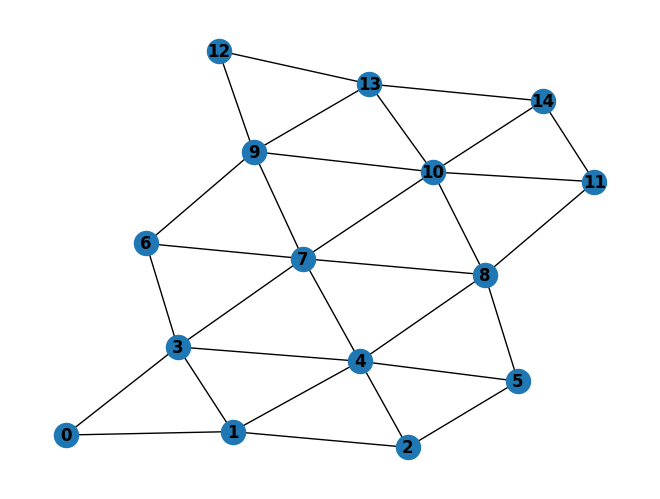

In [29]:
G=nx.triangular_lattice_graph(4, 4)
G=nx.convert_node_labels_to_integers(G)
nx.draw(G, with_labels=True, font_weight='bold')

(a) Use the QPU to find the minimum vertex cover for the graph above.

In [30]:
# Finding the solution to a minimum vertex cover problem can be done very simply with one function that runs with the sampler_6 QPU
print(dnx.min_vertex_cover(G, sampler_6))

[1, 3, 4, 5, 7, 9, 10, 11, 13]


(b) Use `ExactSolver` to get the optimum answer (only 9 vertices!). Did the QPU get it? If not, run again until it gets the optimum answer.

In [31]:
# We can use the same line of code but with sampler_CPU to find the true optimum answer
print(dnx.min_vertex_cover(G, sampler_CPU))

[1, 3, 4, 5, 7, 9, 10, 11, 13]


As we can see from above, the solutions match for both the CPU and the QPU, thus the QPU does indeed give the optimum answer

### Question 4

Use the QPU to prove that the triangular lattice in Problem 3 above can be colored with three colors.

*Hint*: The solution follows closely the map coloring example in the Ocean documentation. To get the list of nodes and neighbors of the graph use `nods = nx.nodes(G)` and `neighs = nx.edges(G)`, respectively. `nods` will play the role of `provinces` and `neighs` of `neighbors`. But these are now integers (rather than strings) so you will have to convert some of the variables into strings, e.g. replace `u` for `str(u)`, etc when appropriate.

In [38]:
nods = nx.nodes(G)
neighs = nx.edges(G)

# setting up the one-hot constraints to color each node either red green or blue
# this will hold all important linear coefficients and a ton of useless quadradic coefficients (since no nodes are connected to themselves)
colors = ['r', 'g', 'b']
bqmQ4 = BinaryQuadraticModel('BINARY')
for nod in nods:
    bqmQ4.update(combinations([f'{nod}_{c}' for c in colors], 1))

# create a bqm that adds energy for combinations of neighbors that have the same color. This penalizes neighbors with the same color which helps us get closer to our goal as neighbors with different colors have no energy penalty
# this will hold all important quadradic coefficients (the energy penalties)
bqmQ4Neighbors = BinaryQuadraticModel('BINARY')
for neigh in neighs:
    for c in colors:
        # adding the quadradic coefficient where the colors are the same is how we create the penalty
        bqmQ4Neighbors.add_quadratic(f'{neigh[0]}_{c}', f'{neigh[1]}_{c}', 1)

# Now that we have two bqm's holding information for our linear coefficients and quadradic coefficients, we can combine them and try to solve it with the QPU
bqmQ4 = bqmQ4 + bqmQ4Neighbors

In [39]:
# try to solve the bqm
responseQ4 = sampler_6.sample(bqmQ4, num_reads=1000)
if (responseQ4.first.energy > 0):
    print("Didn't solve it :(")
else:
    print('The QPU found a solution!')

The QPU found a solution!


Quick aside, that worked on the first try which is pretty cool. Let's visualise the map now

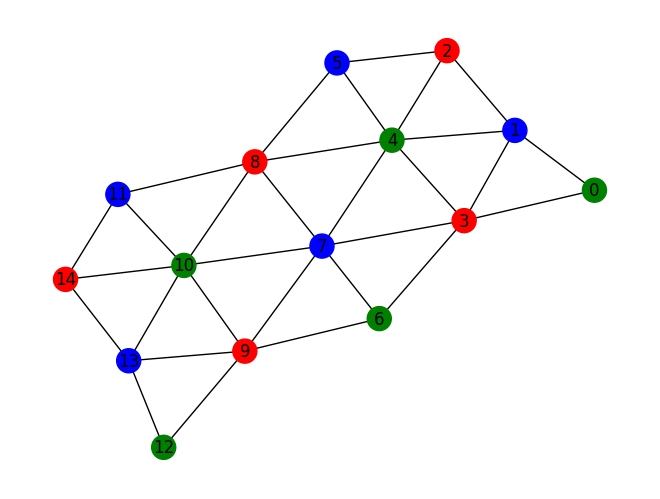

In [46]:
Gcolored = nx.Graph()
Gcolored.add_nodes_from(nods)
Gcolored.add_edges_from(neighs)

nodeColors = {}
for nod in nods:
    for c in colors:
        # if the current node/color pair we have is in the solution found by the QPU add that node/color pair to the nodeColors dictionary
        if responseQ4.first.sample[f'{nod}_{c}']:
            nodeColors[nod] = c

nx.draw(Gcolored, with_labels=True, node_color=[nodeColors.get(nod) for nod in Gcolored.nodes()], cmap=plt.cm.rainbow)
plt.show()